In [1]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

Source of this tutorial <br>
https://www.datacamp.com/tutorial/introduction-factor-analysis <br>
For a description of the date see: R_ 25 Personality items representing 5 factors.pdf

Factor Analysis Assumptions:

* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be perfect multicollinearity.
* There should not be homoscedasticity between the variables.

---
### How does Factor Analysis Work?
The primary objective of factor analysis is to reduce the number of observed variables and find unobservable variables. These unobserved variables help the market researcher to conclude the survey. This conversion of the observed variables to unobserved variables can be achieved in two steps:

* Factor Extraction: In this step, the number of factors and approach for extraction selected using variance partitioning methods such as principal components analysis and common factor analysis.
* Factor Rotation: In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to improve the overall interpretability. There are lots of rotation methods that are available such as: Varimax rotation method, Quartimax rotation method, and Promax rotation method.

<em>What is a factor?</em><br>
A factor is a latent variable which describes the association among the number of observed variables. The maximum number of factors are equal to a number of observed variables. Every factor explains a certain variance in observed variables. The factors with the lowest amount of variance were dropped. Factors are also known as latent variables or hidden variables or unobserved variables or Hypothetical variables.

<em>What are the factor loadings?</em><br>
The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables.

<em>What is Eigenvalues?</em><br>
Eigenvalues represent variance explained each factor from the total variance. It is also known as characteristic roots.

<em>What are Communalities?</em><br>
Commonalities are the sum of the squared loadings for each variable. It represents the common variance. It ranges from 0-1 and value close to 1 represents more variance.

<em>What is Factor Rotation?</em><br>
Rotation is a tool for better interpretation of factor analysis. Rotation can be orthogonal or oblique. It re-distributed the commonalities with a clear pattern of loadings.

---
### Factor Analysis Vs. Principle Component Analysis

* PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.
* PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.
* PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.
* PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.
* PCA is a kind of dimensionality reduction method whereas factor analysis is the latent variable method.
* PCA is a type of factor analysis. PCA is observational whereas FA is a modeling technique.

In [2]:
df= pd.read_csv("bfi.csv")
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [3]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [4]:
# Dropping unnecessary columns
df.drop(['Unnamed: 0', 'gender', 'education', 'age'],axis=1,inplace=True)
df.dropna(inplace=True)
variables = df.columns.tolist()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

In [6]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


---
## Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

Bartlett’s Test
Kaiser-Meyer-Olkin Test
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [7]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(18146.065577235026, 0.0)

In [8]:
from factor_analyzer.factor_analyzer import calculate_kmo
# kmo_all
kmo_model=calculate_kmo(df)


---
### Performing Factor Analysis

## ev = 25

In [9]:
# Create factor analysis object and perform factor analysis

# Eigenvalues - we know we don't need 25, one for each variable but we want a good Scree plot.
ev = 25

fa = FactorAnalyzer(ev, rotation = None)
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

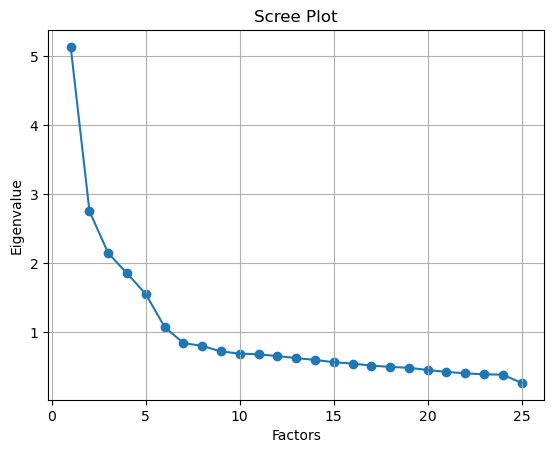

In [10]:
# Create scree plot using matplotlib
#plt.scatter(range(1,df.shape[1]+1),ev)    # put the markers on
plt.scatter(range(1,df.shape[1]+1),ev)    # put the markers on chart
plt.plot(range(1,df.shape[1]+1),ev)       # put the line on chart
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


---
### Performing Factor Analysis

## ev = 6
Based on the Scree plot 6 factors looks like a good choice

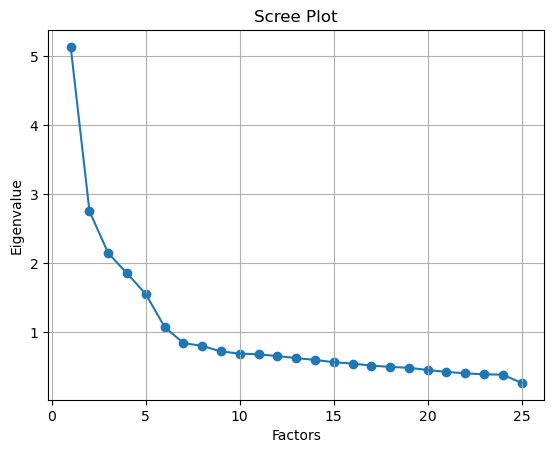

In [11]:
# Eigenvalues
ev = 6

#fa = FactorAnalyzer(ev, rotation = None)
fa = FactorAnalyzer(ev, rotation = 'varimax')
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()

# Create scree plot using matplotlib
#plt.scatter(range(1,df.shape[1]+1),ev)    # put the markers on
plt.scatter(range(1,df.shape[1]+1),ev)    # put the markers on chart
plt.plot(range(1,df.shape[1]+1),ev)       # put the line on chart
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [12]:
loads = fa.loadings_                                # get the factor loadings
loads = pd.DataFrame(loads)                         # bring them into a data frame
factor_head = []                                    # create an empty variable for collecting headings

for f in range(1, loads.shape[1]+1):                # create a Factor x for each factor where x is 1, 2, ... 
    factor_head.append('Factor_'+str(f))

loads.columns = factor_head                         # add the factor heads to the loads data frame
loads['variables'] = variables                      # add the variable names to the loads data frame
loads.set_index('variables', inplace=True)          # set the variables as the index
loads.style.highlight_max(color = 'darkgreen', axis = 0)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
variables,,,,,,
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359


In [20]:
# define a function that will identify the highest loading variable on each factor.

# Argurments 
#     (1) the dataframe containing the loads 
#     (2) the factor name
#     (3) the number of variable loading you want to see

def factor_loading (loads_df, factor_name, n):
      factor_df = loads_df[factor_name]
      factor_df_as = factor_df.iloc[loads_df[factor_name].abs().argsort()][::-1]
      print('-----------   ', factor_name, '   -------------------------')
      print(factor_df_as.head(n))
      return factor_df_as

In [14]:
for f in factor_head:
      f = factor_loading(loads, f, 7)

-----------    Factor_1    -------------------------
variables
N1    0.805806
N2    0.789832
N3    0.725081
N4    0.578319
N5    0.523097
C5    0.284187
E2    0.233624
Name: Factor_1, dtype: float64
-----------    Factor_2    -------------------------
variables
E2   -0.684578
E4    0.658395
E1   -0.590451
E3    0.556774
E5    0.507535
A5    0.414458
N4   -0.345072
Name: Factor_2, dtype: float64
-----------    Factor_3    -------------------------
variables
C2    0.674545
C4   -0.638475
C1    0.554582
C3    0.551164
C5   -0.544838
E5    0.309813
A4    0.235140
Name: Factor_3, dtype: float64
-----------    Factor_4    -------------------------
variables
A2    0.661141
A3    0.605933
A1   -0.530987
A5    0.469698
A4    0.404594
E4    0.241143
E3    0.179396
Name: Factor_4, dtype: float64
-----------    Factor_5    -------------------------
variables
O5   -0.576743
O3    0.566128
O2   -0.496640
O1    0.479477
O4    0.349227
E3    0.241180
E5    0.200821
Name: Factor_5, dtype: float64
-----

In [15]:
# Get variance of each factors
Factor_Variance = fa.get_factor_variance()
print(f'SS Loadings: {Factor_Variance[0]}')
print(f'Proportiion Var: {Factor_Variance[1]}')
print(f'Cumulative Var: {Factor_Variance[2]}')

SS Loadings: [2.7269887  2.60223901 2.07347064 1.7134991  1.50483136 0.63029714]
Proportiion Var: [0.10907955 0.10408956 0.08293883 0.06853996 0.06019325 0.02521189]
Cumulative Var: [0.10907955 0.21316911 0.29610793 0.3646479  0.42484115 0.45005304]


---
## ev = 5

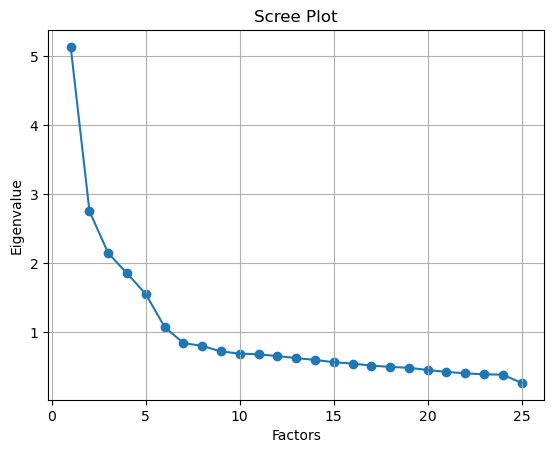

In [16]:
# Eigenvalues
ev = 5

#fa = FactorAnalyzer(ev, rotation = None)
fa = FactorAnalyzer(ev, rotation = 'varimax')
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()

# Create scree plot using matplotlib
#plt.scatter(range(1,df.shape[1]+1),ev)    # put the markers on
plt.scatter(range(1,df.shape[1]+1),ev)    # put the markers on chart
plt.plot(range(1,df.shape[1]+1),ev)       # put the line on chart
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [17]:
loads = fa.loadings_                                # get the factor loadings
loads = pd.DataFrame(loads)                         # bring them into a data frame
factor_head = []                                    # create an empty variable for collecting headings

for f in range(1, loads.shape[1]+1):                # create a Factor x for each factor where x is 1, 2, ... 
    factor_head.append('Factor_'+str(f))

loads.columns = factor_head                         # add the factor heads to the loads data frame
loads['variables'] = variables                      # add the variable names to the loads data frame
loads.set_index('variables', inplace=True)          # set the variables as the index
loads.style.highlight_max(color = 'darkgreen', axis = 0)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
variables,,,,,
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535


In [18]:
for f in factor_head:
      f = factor_loading(loads, f, 7)

-----------    Factor_1    -------------------------
variables
N1    0.786807
N2    0.754109
N3    0.731721
N4    0.590602
N5    0.537858
C5    0.290318
E2    0.244743
Name: Factor_1, dtype: float64
-----------    Factor_2    -------------------------
variables
E2   -0.678731
E4    0.646833
E1   -0.574835
E3    0.536816
E5    0.504069
A5    0.393034
N4   -0.345388
Name: Factor_2, dtype: float64
-----------    Factor_3    -------------------------
variables
C2    0.648731
C4   -0.633806
C5   -0.562467
C3    0.557036
C1    0.545824
E5    0.312899
A4    0.230584
Name: Factor_3, dtype: float64
-----------    Factor_4    -------------------------
variables
A3    0.650743
A2    0.626946
A5    0.537087
A4    0.435624
A1   -0.428166
E4    0.306101
E3    0.257906
Name: Factor_4, dtype: float64
-----------    Factor_5    -------------------------
variables
O3    0.596007
O5   -0.533778
O1    0.504907
O2   -0.468925
O4    0.369012
E3    0.280877
E5    0.213739
Name: Factor_5, dtype: float64


In [19]:
# Get variance of each factors
Factor_Variance = fa.get_factor_variance()
print(f'SS Loadings: {Factor_Variance[0]}')
print(f'Proportiion Var: {Factor_Variance[1]}')
print(f'Cumulative Var: {Factor_Variance[2]}')

SS Loadings: [2.70963262 2.47308982 2.04110563 1.844498   1.52215297]
Proportiion Var: [0.1083853  0.09892359 0.08164423 0.07377992 0.06088612]
Cumulative Var: [0.1083853  0.2073089  0.28895312 0.36273304 0.42361916]
